In [2]:
#importing the required libraries
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt

The location with count of fundings are:
+-------------------------------------+
|   Location   |   Count of Fundings  |
+-------------------------------------+
|  Bangalore   |                 637  |
|  Mumbai      |                 449  |
|  NCR         |                 709  |
+-------------------------------------+


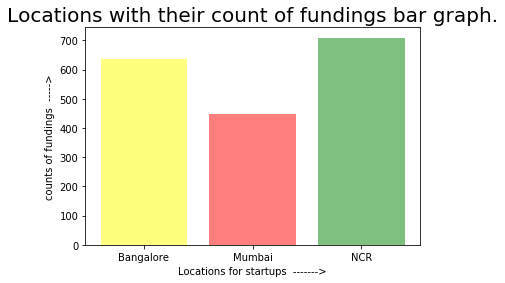

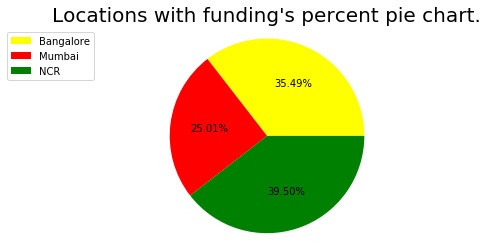

Location with maximum number of fundings is: NCR 709


In [8]:
#reading the dataframe from the file
df1=pd.read_csv('startup_funding.csv')

#creating copy of it to avoid changes in orignal dataframe
df_copy=df1.copy()

#replacing the null entries present in CityLocation column with nan 
df_copy.CityLocation.fillna('nan',inplace=True)

#handling the case sensitive and misspelt city names. 
df_copy.CityLocation.replace('Delhi','New Delhi',inplace=True)
df_copy.CityLocation.replace('bangalore','Bangalore',inplace=True)

#maintaining the dictionary to count the funding for the required 3 cities.
city_counts={}

#iterating over the values of CityLocation column using column_name.values method.
for i in df_copy.CityLocation.values:
    
    #skipping the null entries.
    if i!='nan':
        
        #incase multiple location are given splitting to handle them seprately.
        j=i.split('/')
        
        #iterating over each element of list j.
        for i in j:
            
            #using the strip() method removing the extra spaces present in location.
            i=i.strip()
            
            #Noida, Gurgaon and New Delhi are counted in NCR location.
            if i=='Noida' or i=='New Delhi' or i=='Gurgaon':
                city_counts['NCR']=city_counts.get('NCR',0)+1
                
            #incase the location is Bangalore maintaing it's count.
            elif i=='Bangalore':
                city_counts[i]=city_counts.get(i,0)+1
                
            #incase the location is Mumbai maintaing it's count.
            elif i=='Mumbai':
                city_counts[i]=city_counts.get(i,0)+1
                
#getting the Locations.
location=list(city_counts.keys())

#getting their respective funding counts.
funding_counts=list(city_counts.values())

#tabular reprsentation of location count of fundings recived.
print('The location with count of fundings are:')
print('+-------------------------------------+')
print('|'+' '*3 +'Location'+' '*3+'|'+' '*3+'Count of Fundings'+' '*2+'|')
print('+-------------------------------------+')
for i in range(3):
    print('|'+' '*2+str(location[i])+' '*(11-len(location[i])),'|'+' '*17+str(funding_counts[i])+' '*2+'|')
print('+-------------------------------------+')

#colors for different locations
c=['yellow','red','green']

#plotting bar graph between location and funding counts using plt.bar() method
plt.bar(location,funding_counts,color=c,alpha=0.5)
plt.xlabel('Locations for startups  ------->')
plt.ylabel('counts of fundings  ----->')
plt.title('Locations with their count of fundings bar graph.',fontdict={'fontsize':20})
plt.show()

#plotting the pie chart.
legend=[]
for i in location:
    legend.append(i)
plt.pie(funding_counts,colors=c,autopct='%.2f%%')
plt.title('Locations with funding\'s percent pie chart.',fontdict={'fontsize':20})
plt.legend(legend,bbox_to_anchor=(0,1))
plt.axis('equal')
plt.show()

#getting the location which got maximum number of funding.
loc_maxm_funding=max(city_counts,key=city_counts.get)

#getting the count of funding of the location.
count=city_counts[loc_maxm_funding]

#printing the result
print('Location with maximum number of fundings is:'+str(' ')+loc_maxm_funding+str(' ')+str(count))

The Top 5 Investors are:
+------------------------------------------------------+
|     Investors Name     |      Counts of Investment   |
+------------------------------------------------------+
|  Sequoia Capital       |                         64  |
|  Accel Partners        |                         53  |
|  Kalaari Capital       |                         44  |
|  SAIF Partners         |                         41  |
|  Indian Angel Network  |                         40  |
+------------------------------------------------------+


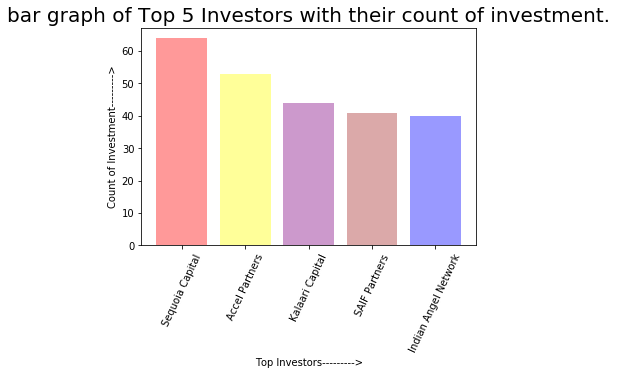

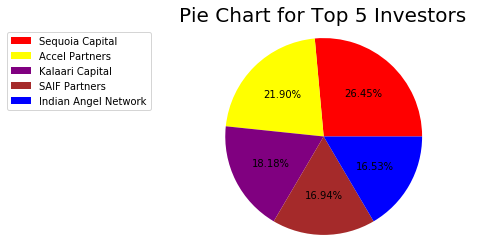

In [4]:
#reading the dataframe from the file using pd.read_csv().
df2=pd.read_csv('startup_funding.csv')

#creating the copy of dataframe to avoid the reflection of changes in orignal dataframe with copy().
df_cpy=df2.copy()

#replacing all the empty entries in InvestorsName column with 'nan' value with fillna().
df_cpy.InvestorsName.fillna('nan',inplace=True)

#marking all type of Undisclosed Investors as 'Undisclosed Investors' in InvestorsName column using replace().
df_copy['InvestorsName'].replace('Undisclosed Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('undisclosed Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('undisclosed investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed angel investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed multiple investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Dubai based HNIs','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Ex Mckinsey Directors and Partners','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed HNI investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Japanese investor','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed US Based Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Un disclosed investors','Undisclosed Investors',inplace = True)

#creating a dictionary to store the investors as key and count of startups in which they have invested as values.
per_inv_count={}

#iterating over df_cpy.InvestorsName using values in which each row is as a list.
for i in df_cpy.InvestorsName.values:
    
    #here we are not considering the 'nan' and 'Undisclosed Investors'.
    if i not in ['nan','Undisclosed Investors']:
        
        #splitting  the name of investors in case there are multiple investors for one startup.
        for j in str(i).split(','):
            
            #stripping each name in the list returned by split() and incresing the investor's count of investment.
            per_inv_count[j.strip()]=per_inv_count.get(j.strip(),0)+1
            
#creating a new dictionary based upon counts on investment in descreasing order.
sorted_per_inv_count={k: v for k,v in sorted(per_inv_count.items(), key=lambda item: item[1], reverse=True)}

#selecting the first five investors.
investor=list(sorted_per_inv_count.keys())[:5]

#selecting the counts of investors investment in startup.
counts_investment=list(sorted_per_inv_count.values())[:5]

#Tabular representation of result.
print('The Top 5 Investors are:')
print('+------------------------------------------------------+')
print('|'+' '*5 +'Investors Name'+' '*5+'|'+' '*6+'Counts of Investment'+' '*3+'|')
print('+------------------------------------------------------+')
for i in range(5):
    print('|'+' '*2+str(investor[i])+' '*(21-len(investor[i])),'|'+' '*25+str(counts_investment[i])+' '*2+'|')
print('+------------------------------------------------------+')

#creating the colour array.
c=['red','yellow','purple','brown','blue']

#creating the bar Graph.
plt.bar(investor,counts_investment,color=c,alpha=0.4)
plt.title('bar graph of Top 5 Investors with their count of investment.',fontdict={'fontsize':20})
plt.xlabel('Top Investors--------->')
plt.ylabel('Count of Investment--------->')
plt.xticks(investor,rotation=65)
plt.show()

#creating the pie chart.
legend=[]
for i in investor:
    legend.append(i)
plt.pie(counts_investment,autopct='%.2f%%',colors=c)
plt.title('Pie Chart for Top 5 Investors',fontdict={'fontsize':20})
plt.legend(legend,bbox_to_anchor=(0,1))
plt.axis('equal')
plt.show()


The Top 5 Unique Investors are:
+------------------------------------------------------+
|     Investors Name     |      Counts of Investment   |
+------------------------------------------------------+
|  Sequoia Capital       |                         48  |
|  Accel Partners        |                         47  |
|  Kalaari Capital       |                         41  |
|  Indian Angel Network  |                         40  |
|  Blume Ventures        |                         36  |
+------------------------------------------------------+


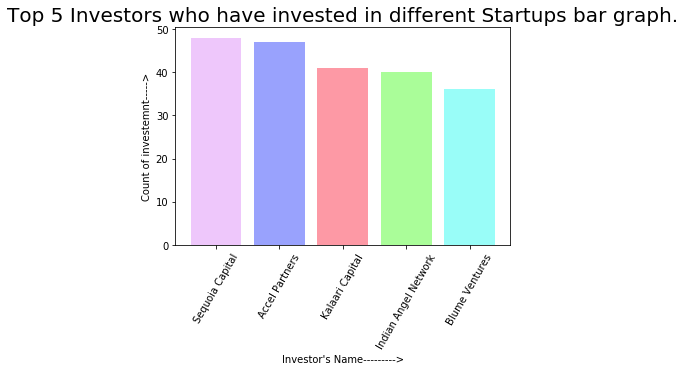

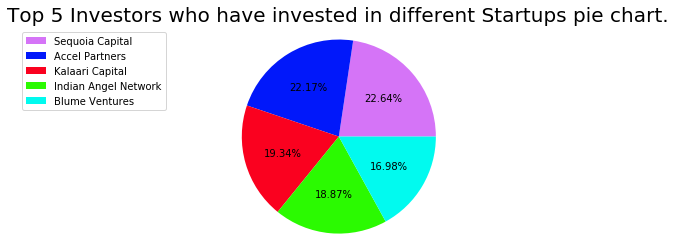

In [9]:
#reading the dataframe from the file using pd.read_csv().
df3=pd.read_csv('startup_funding.csv')

#creating the copy of dataframe to avoid the reflection of changes in orignal dataframe with copy().
df_copy=df3.copy()

#correcting all the wrong entries in StartupName column using the replace().
df_copy['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df_copy['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df_copy['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df_copy['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df_copy['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df_copy['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df_copy['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df_copy['StartupName'].replace('Olacabs','Ola',inplace = True)

#replacing all the empty entries in InvestorsName column with 'nan' value with fillna().
df_copy.InvestorsName.fillna('nan',inplace=True)

#marking all type of Undisclosed Investors as 'Undisclosed Investors' in InvestorsName column using replace().
df_copy['InvestorsName'].replace('Undisclosed Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('undisclosed Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('undisclosed investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed angel investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed multiple investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Dubai based HNIs','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Ex Mckinsey Directors and Partners','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed HNI investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Japanese investor','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed US Based Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Un disclosed investors','Undisclosed Investors',inplace = True)

#creating a dictionary to store the investors as key and different startups in which they have invested as values.
d={}

#selecting startupName and investorsName from df_copy and storing the result in start_investment.
start_investment=df_copy[['StartupName','InvestorsName']]

#iterating over si values in which each row is as a list.
for i in start_investment.values:
    
    #At the 1st index of each row the InvestorsName values are present, splitting them with split() using delimiter as','.
    inv_names=str(i[1]).split(',')
    
    #iterating over the list returned by split() and with help of strip() removing all extra spaces.  
    for j in inv_names:
        
        #here we are not considering the 'nan' and 'Undisclosed Investors'.
        if j.strip() not in ['nan','Undisclosed Investors']:
            
            #If the investor name is present as key then adding the startupName value in his startupList.
            if j.strip() in d:
                
                #Adding the startupName in startupList only if the investor has not invested in it previously.
                if i[0] not in d[j.strip()]:
                    d[j.strip()]=d[j.strip()]+[i[0]]
            
            #Incase the investor Name is not present as key, adding the startupName in his startupList.
            else:
                d[j.strip()]=[i[0]]

#We are intrested in the count of investment made by investor in different startups, we are making the value of each investor
#as the length of his invested startupList.
for i in d:
    d[i]=len(set(d[i]))
    
#creating a new dictionary based upon counts on investment in descreasing order.   
uniq_inve={k: v for k,v in sorted(d.items(), key=lambda item:item[1],reverse=True)}

#Getting the first 5 investors with their respective counts of investment.
investor=[]
invested_in=[]
count=0
for i in uniq_inve:
    if count==5:
        break
    if i!='':
        investor.append(i)
        invested_in.append(uniq_inve[i])
        count+=1

#creating the tabular representation of the result.
print('The Top 5 Unique Investors are:')
print('+------------------------------------------------------+')
print('|'+' '*5 +'Investors Name'+' '*5+'|'+' '*6+'Counts of Investment'+' '*3+'|')
print('+------------------------------------------------------+')
for i in range(5):
    print('|'+' '*2+str(investor[i])+' '*(21-len(investor[i])),'|'+' '*25+str(invested_in[i])+' '*2+'|')
print('+------------------------------------------------------+')

#creating the  colour array.
c=['#D574F7', '#0118FA', '#FA011F', '#2BFA01', '#01FAEF']

#creating the bargraph.
plt.bar(investor,invested_in,color=c,alpha=0.4)
plt.title('Top 5 Investors who have invested in different Startups bar graph.',fontdict={'fontsize':20})
plt.xlabel('Investor\'s Name--------->')
plt.ylabel('Count of investemnt----->')
plt.xticks(rotation=60)
plt.show()

#creating the pie chart.
legend=[]
for i in investor:
    legend.append(i)
plt.pie(invested_in,autopct='%.2f%%',colors=c)
plt.title('Top 5 Investors who have invested in different Startups pie chart.',fontdict={'fontsize':20})
plt.legend(legend,bbox_to_anchor=(0, 1))
plt.axis('equal')
plt.show()
        

Top 5 different Investors with InvestmentType as Crowd Funding or Seed Funding are:
+------------------------------------------------------+
|     Investors Name     |      Counts of Investment   |
+------------------------------------------------------+
|  Indian Angel Network  |                         33  |
|  Rajan Anandan         |                         23  |
|  LetsVenture           |                         16  |
|  Anupam Mittal         |                         16  |
|  Kunal Shah            |                         14  |
+------------------------------------------------------+


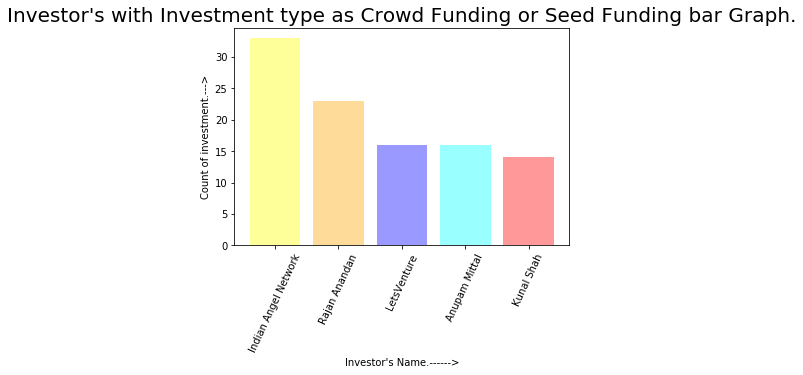

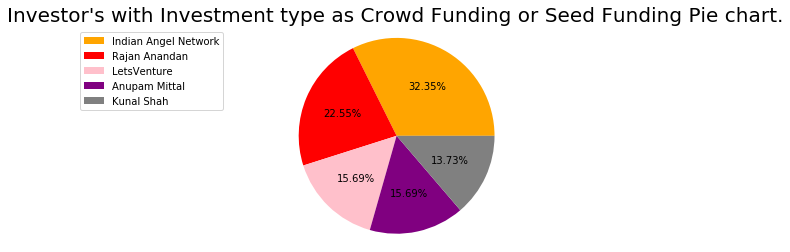

In [16]:
#reading the dataframe from the file using pd.read_csv().
df4=pd.read_csv('startup_funding.csv')

#creating the copy of dataframe to avoid the reflection of changes in orignal dataframe with copy().
df_copy=df4.copy()

#correcting all the wrong entries in StartupName column using the replace().
df_copy['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df_copy['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df_copy['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df_copy['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df_copy['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df_copy['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df_copy['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df_copy['StartupName'].replace('Olacabs','Ola',inplace = True)

#replacing all the empty entries in InvestorsName column with 'nan' value with fillna().
df_copy.fillna('nan',inplace=True)

#marking all type of Undisclosed Investors as 'Undisclosed Investors' in InvestorsName column using replace().
df_copy['InvestorsName'].replace('Undisclosed Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('undisclosed Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('undisclosed investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed angel investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed multiple investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Dubai based HNIs','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Ex Mckinsey Directors and Partners','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed HNI investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Japanese investor','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed US Based Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Un disclosed investors','Undisclosed Investors',inplace = True)

#correcting all wrong enteries in InvestmentType column with replace().
df_copy['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df_copy['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df_copy['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

#creating a bool series by selecting only those rows where InvestmentType==Crowd Funding.
crowd_fund=df_copy['InvestmentType']=='Crowd Funding'

#creating a bool series by selecting only those rows where InvestmentType==Seed Funding.
seed_fund=df_copy['InvestmentType']=='Seed Funding'

#selecting only those rows from df_copy where the bool series crowd_fund or seed_fund holds True.
seed_crowd=df_copy[crowd_fund | seed_fund]

#creating a dictionary to hold the records of investors and list of different startups in which they have invetsed.
d={}

#iterating over the values in dataframe where InvestmentType==Crowd Funding or Seed Funding using values,
#which returns a list for each row.
for i in seed_crowd.values:
    
    #At the 6th index of each row the InvestorsName values are present, splitting them with split() using delimiter as','.
    for j in str(i[6]).split(','):
        
        #iterating over the list returned by split() and with help of strip() removing all extra spaces. 
        #here we are not considering the 'nan' and 'Undisclosed Investors'.
        if j.strip() not in ['nan','Undisclosed Investors']:
            
            #If the investor name is present as key then adding the startupName value in his startupList.
            if j.strip() in d:
                
                #Adding the startupName in startupList only if the investor has not invested in it previously.
                if i[2] not in d[j.strip()]:
                    d[j.strip()]=d[j.strip()]+[i[2]]
            
            #Incase the investor Name is not present as key, adding the startupName in his startupList.
            else:
                d[j.strip()]=[i[2]]
                
#We are intrested in the count of investment made by investor in different startups, we are making the value of each investor
#as the length of his invested startupList.
for i in d:
    d[i]=len(set(d[i]))
    
#creating a new dictionary based upon counts on investment in descreasing order.    
rev={k: v for k,v in sorted(d.items(),key=lambda item: item[1],reverse=True)}

#Getting the first 5 investors with their respective counts of investment.
investor=[]
count_of_investment=[]
count=0
for k,v in rev.items():
    if count==5:
        break
    if k!='':
        investor.append(k)
        count_of_investment.append(v)
        count+=1

#creating the tabular representation of the result.
print('Top 5 different Investors with InvestmentType as Crowd Funding or Seed Funding are:')
print('+------------------------------------------------------+')
print('|'+' '*5 +'Investors Name'+' '*5+'|'+' '*6+'Counts of Investment'+' '*3+'|')
print('+------------------------------------------------------+')
for i in range(5):
    print('|'+' '*2+str(investor[i])+' '*(21-len(investor[i])),'|'+' '*25+str(count_of_investment[i])+' '*2+'|')
print('+------------------------------------------------------+')

#creating the  colour array.
pie_color=['Orange','red','pink','purple', 'gray']
bar_color=['yellow', 'Orange', 'blue', 'cyan', 'red']

#creating the bargraph.
plt.bar(investor,count_of_investment,color=bar_color,alpha=0.4)
plt.xlabel('Investor\'s Name.------>')
plt.ylabel('Count of investment.--->')
plt.title('Investor\'s with Investment type as Crowd Funding or Seed Funding bar Graph.',fontdict={'fontsize':20})
plt.xticks(rotation=65)
plt.show()

#creating the pie chart.
legend=[]
for i in investor:
    legend.append(i) 
plt.pie(count_of_investment,autopct='%.2f%%',colors=pie_color)
plt.title('Investor\'s with Investment type as Crowd Funding or Seed Funding Pie chart.',fontdict={'fontsize':20})
plt.legend(legend,bbox_to_anchor=(0, 1))
plt.axis('equal')
plt.show()


The Top 5 different Investors are with InvestmentType as Private Equity are:
+------------------------------------------------------+
|     Investors Name     |      Counts of Investment   |
+------------------------------------------------------+
| Sequoia Capital        |                         45  |
| Accel Partners         |                         43  |
| Kalaari Capital        |                         35  |
| Blume Ventures         |                         27  |
| SAIF Partners          |                         24  |
+------------------------------------------------------+


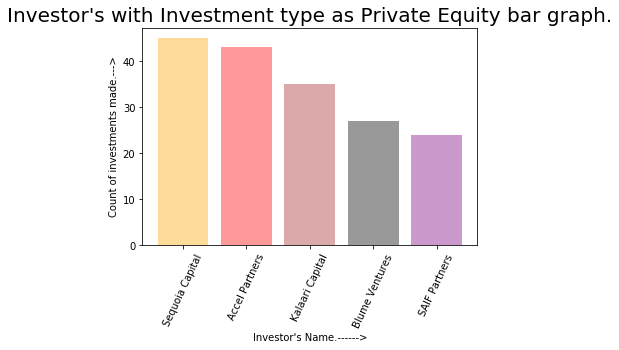

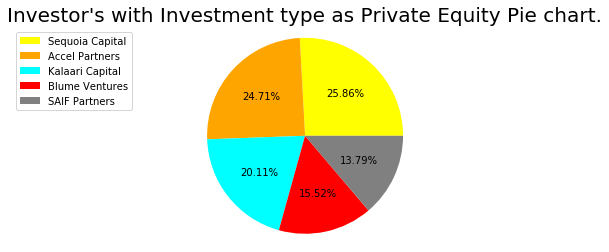

In [20]:
#reading the dataframe from the file using pd.read_csv().
df5=pd.read_csv('startup_funding.csv')

#creating the copy of dataframe to avoid the reflection of changes in orignal dataframe with copy().
df_copy=df5.copy()

#correcting all the wrong entries in StartupName column using the replace().
df_copy['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df_copy['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df_copy['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df_copy['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df_copy['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df_copy['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df_copy['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df_copy['StartupName'].replace('Olacabs','Ola',inplace = True)

#replacing all the empty entries in InvestorsName column with 'nan' value with fillna().
df_copy.InvestorsName.fillna('nan',inplace=True)

#marking all type of Undisclosed Investors as 'Undisclosed Investors' in InvestorsName column using replace().
df_copy['InvestorsName'].replace('Undisclosed Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('undisclosed Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('undisclosed investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed angel investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed multiple investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Dubai based HNIs','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Ex Mckinsey Directors and Partners','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed HNI investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Japanese investor','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed US Based Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Un disclosed investors','Undisclosed Investors',inplace = True)

#correcting all wrong enteries in InvestmentType column with replace(). 
df_copy['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df_copy['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df_copy['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

#creating a bool series by selecting only those rows where InvestmentType==Private Equity.
inv_pe=df_copy['InvestmentType']=='Private Equity'

#selecting only those rows from df_copy where the bool series values is True.
df_inv_pe=df_copy[inv_pe]

#creating a dictionary to hold the records of investors and list of different startups in which they have invetsed.
di={}

#iterating over the values in dataframe where InvestmentType==Private Equity using values, which returns a list for each row.
for i in df_inv_pe.values:
    
    #At the 6th index of each row the InvestorsName values are present, splitting them with split() using delimiter as','.
    for j in str(i[6]).split(','):
        
        #iterating over the list returned by split() and with help of strip() removing all extra spaces. 
        #here we are not considering the 'nan' and 'Undisclosed Investors'.
        if j.strip() not in ['nan','Undisclosed Investors']:
            
            #If the investor name is present as key then adding the startupName value in his startupList.
            if j.strip() in di:
                
                #Adding the startupName in startupList only if the investor has not invested in it previously.
                if i[2] not in di[j.strip()]:
                    di[j.strip()]=di[j.strip()]+[i[2]]
            
            #Incase the investor Name is not present as key, adding the startupName in his startupList.
            else:
                di[j.strip()]=[i[2]]
                
#We are intrested in the count of investment made by investor in different startups, we are making the value of each investor
#as the length of his invested startupList.
for i in di:
    di[i]=len(di[i])

#creating a new dictionary based upon counts on investment in descreasing order.
desc_inv_pe={k:v for k,v in sorted(di.items(),key=lambda item: item[1], reverse=True)}

#Getting the first 5 investors using .keys()
investor=list(desc_inv_pe.keys())[:5]
#Getting the count for first 5 investors using .values()
count_of_investment=list(desc_inv_pe.values())[:5]

#creating the tabular representation of the result.
print('The Top 5 different Investors are with InvestmentType as Private Equity are:')
print('+------------------------------------------------------+')
print('|'+' '*5 +'Investors Name'+' '*5+'|'+' '*6+'Counts of Investment'+' '*3+'|')
print('+------------------------------------------------------+')
for i in range(5):
    print('|'+' '+str(inv[i])+' '* (22-len(inv[i])),'|'+' '*25+str(count_of_investment[i])+' '*2+'|')
print('+------------------------------------------------------+')

#creating the  colour array.
bar_color=['Orange','red','brown','black','purple']
pie_color=['yellow', 'orange', 'cyan', 'red', 'gray']

#creating the bargraph.
plt.bar(investor,count_of_investment,color=bar_color,alpha=0.4)
plt.xlabel('Investor\'s Name.------>')
plt.ylabel('Count of investments made.--->')
plt.title('Investor\'s with Investment type as Private Equity bar graph.',fontdict={'fontsize':20})
plt.xticks(rotation=65)
plt.show()

#creating the pie chart.
legend=[]
for i in investor:
    legend.append(i) 
plt.pie(count_of_investment,autopct='%.2f%%',colors=pie_color)
plt.title('Investor\'s with Investment type as Private Equity Pie chart.',fontdict={'fontsize':20})
plt.legend(legend,bbox_to_anchor=(0, 1))
plt.axis('equal')
plt.show()
    